In [1]:
import flexpart_management.notebooks.release_ds_v3.release_ds_v3_lfc as lfc
from flexpart_management.notebooks.release_ds_v3.release_ds_v3_lfc import *

reload


2020-11-09 15:10:04,500 useful_scit  WARNING  rpy2 not installed. Everything works except functions requiring r


2020-11-09 15:10:04,500 useful_scit  WARNING  rpy2 not installed. Everything works except functions requiring r


In [ ]:


def main():

In [2]:
    ds = get_dcc().load()

In [3]:
    b1 = ds[co.R_CENTER] > .10
    b2 = ds[co.R_CENTER] < .25
    t1 = ds[co.TH_CENTER] > 5 * np.pi/6
    t2 = ds[co.TH_CENTER] < 7.5 * np.pi/6

In [4]:
    _rt = {co.R_CENTER:(b1 & b2),co.TH_CENTER: (t1 & t2)}
    dlp0 = ds[{**_rt, co.ZM:[0]}]
    dlp1 = ds[{**_rt, co.ZM:[0,1]}]
    dlp2 = ds[{**_rt, co.ZM:[0,1,2]}]
    dlpt = ds[{**_rt}]

/Users/diego/miniconda3/envs/b36/lib/python3.8/site-packages/cartopy/mpl/gridliner.py:307: UserWarning: The .xlabels_top attribute is deprecated. Please use .top_labels to toggle visibility instead.
  warnings.warn('The .xlabels_top attribute is deprecated. Please '
/Users/diego/miniconda3/envs/b36/lib/python3.8/site-packages/cartopy/mpl/gridliner.py:343: UserWarning: The .ylabels_right attribute is deprecated. Please use .right_labels to toggle visibility instead.
  warnings.warn('The .ylabels_right attribute is deprecated. Please '
/Users/diego/miniconda3/envs/b36/lib/python3.8/site-packages/cartopy/mpl/gridliner.py:331: UserWarning: The .ylabels_left attribute is deprecated. Please use .left_labels to toggle visibility instead.
  warnings.warn('The .ylabels_left attribute is deprecated. Please '


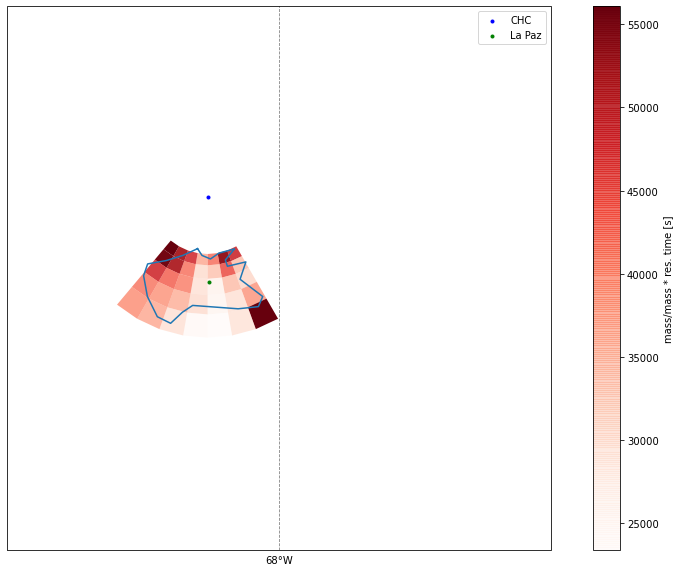

In [5]:
    ax =fa.get_ax_lapaz(lalo_extent=[-68.5,-67.5,-17,-16,])
    lp_series = dlp0.sum([co.RL, co.ZM])
    fa.logpolar_plot(lp_series, ax=ax)
    ax.plot(co.lola_la_paz_pol[:,0],co.lola_la_paz_pol[:,1])
    plt.show()

In [6]:
    dls = [dlp0,dlp1,dlp2,dlpt]
    dss = ['lp0','lp1','lp2','lpt']
    # s = splot(figsize=(20,4))
    df = pd.DataFrame([])
    for dl,dds in zip(dls,dss):
        ser = dl.sum(NRL).to_dataframe()[CO]
        df[dds] = ser
        # ser[CO].to_dataframe().plot(ax=s.ax)
    # plt.show()
    # df = df / df.mean()

In [8]:
    df_ts = import_time_series()
    df_ts[co.RL] = df_ts.index
    df_ts = df_ts.set_index(co.RL)

In [9]:
    df_ts = df_ts.resample('H').mean()

In [10]:
    csv = xr.open_dataset(pjoin(co.tmp_data_path,'cluster_series_v3.nc'))

In [11]:
    s7 = csv['conc_lab_nc18'].loc[{N18:'07_SR',NORM:0,ZCOL:'BL'}].to_dataframe()[CL18]
    t7 = csv['conc_lab_nc18'].loc[{N18:'07_SR',NORM:0,ZCOL:'ALL'}].to_dataframe()[CL18]

In [12]:
    s07=ds[CO][{co.ZM:[0]}].where(ds[N18]=='07_SR').sum(NRL).to_dataframe()
    s12=ds[CO][{co.ZM:[0]}].where(ds[N18]=='12_SR').sum(NRL).to_dataframe()
    s11=ds[CO][{co.ZM:[0]}].where(ds[N18]=='11_SR').sum(NRL).to_dataframe()
    s04=ds[CO][{co.ZM:[0]}].where(ds[N18]=='04_SR').sum(NRL).to_dataframe()
    s02=ds[CO][{co.ZM:[0]}].where(ds[N18]=='02_SR').sum(NRL).to_dataframe()
    s10=ds[CO][{co.ZM:[0]}].where(ds[N18]=='10_SR').sum(NRL).to_dataframe()



In [13]:
    surf = ds[CO][{co.ZM:[0]}].loc[{co.R_CENTER:slice(0,.30)}].sum(NRL).to_dataframe()

In [14]:

    df['s7'] = s7
    df['t7'] = t7
    df['s07'] = s07
    df['BC'] = df_ts['BC']
    df[c91] = df_ts[c91]
    df['surf'] = surf
    df['s12'] = s12
    df['s11'] = s11
    df['s04'] = s04
    df['s02'] = s02
    df['s10'] = s10

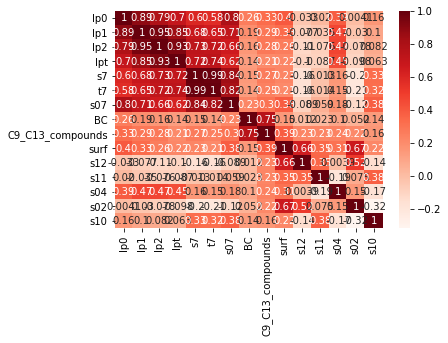

In [15]:
    sns.heatmap(df.corr(), cmap='Reds',annot=True)
    plt.show()

In [16]:
    from bokeh.plotting import figure, output_file, show
    import bokeh
    from bokeh.models import ColumnDataSource
    # noinspection PyUnresolvedReferences
    from bokeh.palettes import Category20 as palette
    _df = (df/df.mean()).reset_index()
    output_file('/tmp/my_first_graph.html')
    p = figure(x_axis_type='datetime',plot_width=1000, plot_height=500)
    _s = ['s07', 's7', 't7', 'lp0', 'lp1', 'lp2', 'lpt','BC',c91,'surf',
          's12','s11','s04','s02','s10'
          ]
    _l = ['7-level0 ','7-level012','7-levelall','lp-level0','lp-level1','lp-level012','lp-levelall',
          'BC',c91,'surf',
          's12', 's11', 's04', 's02', 's10'
          ]
    source = ColumnDataSource(_df)
    for c,y,l in zip(palette[20],_s,_l):
        # print(palette[c])
        p.line(x=co.RL, y=y, source=source, color = c,legend_label=l,line_width=2)
        # p.line(x=co.RL, y='lp0', source=source, color = palette[1])
    p.legend.location = "top_left"
    p.legend.click_policy = "hide"
    show(p)

In [17]:

    df_ts = import_time_series()
    df_ts

,Time_LT,month,day,Temperature_station,Pressure_station,RH_station,BC,Potential temperature,Equivalent potential temperature,water mixing ratio,...,C4_C5_compounds,C6_C8_compounds,C9_C13_compounds,Total_org,Total_CHO,Total_CHON,C45_Total_ratio,C68_Total_ratio,C9more_Total_ratio,CHON_total_ratio
time_utc,,,,,,,,,,,,,,,,,,,,,
2017-12-01 04:00:00.000,2017-12-01 00:00:00.000,12,1,2.000000,542.740000,60.300000,NaN,327.582353,344.106884,4.920181,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-12-01 04:10:00.000,2017-12-01 00:10:00.000,12,1,1.933333,542.720000,59.566667,NaN,327.506427,355.201924,4.836786,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-12-01 04:20:00.000,2017-12-01 00:20:00.000,12,1,1.433333,542.650000,59.866667,NaN,326.923176,353.444533,4.689681,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-12-01 04:30:00.000,2017-12-01 00:30:00.000,12,1,0.500000,542.530000,61.200000,NaN,325.832502,350.304901,4.481914,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-12-01 04:40:00.000,2017-12-01 00:40:00.000,12,1,0.100000,542.603333,57.933333,NaN,325.343675,348.831748,4.118577,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018-06-01 03:00:00.002,2018-05-31 23:00:00.002,5,31,-1.400000,542.340000,17.400000,106.0,323.602539,335.827611,1.103882,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-06-01 03:10:00.002,2018-05-31 23:10:00.002,5,31,-1.666667,542.360000,17.666667,120.0,323.281587,335.339754,1.098983,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-06-01 03:20:00.002,2018-05-31 23:20:00.002,5,31,-1.766667,542.376667,17.433333,157.0,323.159673,335.016611,1.076437,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [18]:
    # df = ser.to_dataframe().reset_index()
    # df['LT']  = df[co.RL] - pd.Timedelta('4H')
    # from bokeh.plotting import figure, output_file, show
    # import bokeh
    # from bokeh.models import ColumnDataSource
    # from bokeh.palettes import Dark2_5 as palette
    # output_file('/tmp/my_first_graph.html')
    # p = figure(x_axis_type='datetime',plot_width=1000, plot_height=500)
    # source = ColumnDataSource(df)
    #
    # p.line(x='LT', y=CO, source=source, )
    # p.line(x='Time_LT', y=c91, source=df_ts, color = palette[1])
    # show(p)

In [19]:
    # bcc = df_ts[['RH_station']].resample('H').mean().dropna()
    bcc = df_ts[['BC']].resample('H').mean().dropna()
    bc = bcc['BC']

In [20]:
    import sklearn.preprocessing as pre
    bcT = pre.QuantileTransformer(
        output_distribution='normal',n_quantiles=100)\
        .fit_transform(bcc.values)
    bcL = pre.QuantileTransformer(n_quantiles=100) \
        .fit_transform(bcc.values)

In [21]:
    bcc['bcT'] = bcT
    bcc['bc2'] = bcT+2
    bcc.index.name=co.RL

In [22]:
    # s = splot(3,squeeze=False)
    # ax0,ax1,ax2 = s.axf[0],s.axf[1],s.axf[2]
    # x1 = 3
    # x2 = 5000
    # bins = np.geomspace(x1,x2,10)
    # bins = [0,*bins[1:-1],np.max([bc.max()+1,bins[-1]])]
    # ax0.hist(bc, bins=bins)
    # ax0.set_xlim(x1,x2)
    # ax0.set_xscale('log')
    # ax0.set_title('log')
    # ax1.hist(bc,bins=100)
    # ax1.set_title('normal')
    #
    # ax2.hist(bcT)
    # ax2.set_title('bc quantile')
    # s.f.tight_layout()
    # plt.show()

In [23]:
    dsc = xr.open_dataset(
        pjoin(co.tmp_data_path,'cluster_series_v3.nc'))

In [24]:
    ser = dsc['conc_lab_nc18'].loc[{'z_column':'BL','normalized':0}]

/Users/diego/useful-scit/useful_scit/imps/__init__.py:388: MatplotlibDeprecationWarning: Passing the sharex parameter of subplots() positionally is deprecated since Matplotlib 3.3; the parameter will become keyword-only two minor releases later.
  f, ax_ = plt.subplots(


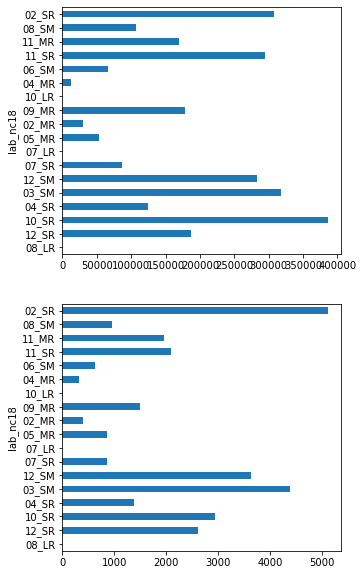

In [25]:
    s = splot(2,figsize=(5,10),sharex=False)
    res = (ser * bcc['BC'].to_xarray()).median(co.RL)
    # res = res/ser.sum(co.RL)

    res.to_dataframe(name='conv')['conv'].plot.barh(ax=s.axf[0])
    ser.median(co.RL).to_dataframe()['conc_lab_nc18'].plot.barh(ax=s.axf[1])
    plt.show()

In [26]:
    import sklearn.linear_model as lm
    reg = lm.ElasticNet(
        positive=True,)

In [27]:
    su = ds[{co.ZM:[0]}].sum([co.RL,co.ZM])

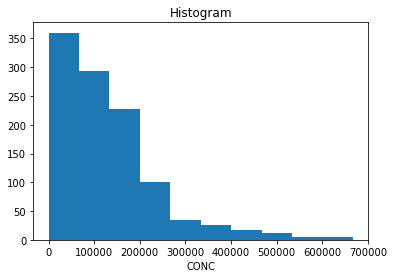

In [28]:
    su[co.CONC].plot.hist()
    plt.show()

/Users/diego/miniconda3/envs/b36/lib/python3.8/site-packages/cartopy/mpl/gridliner.py:307: UserWarning: The .xlabels_top attribute is deprecated. Please use .top_labels to toggle visibility instead.
  warnings.warn('The .xlabels_top attribute is deprecated. Please '
/Users/diego/miniconda3/envs/b36/lib/python3.8/site-packages/cartopy/mpl/gridliner.py:343: UserWarning: The .ylabels_right attribute is deprecated. Please use .right_labels to toggle visibility instead.
  warnings.warn('The .ylabels_right attribute is deprecated. Please '
/Users/diego/miniconda3/envs/b36/lib/python3.8/site-packages/cartopy/mpl/gridliner.py:319: UserWarning: The .xlabels_bottom attribute is deprecated. Please use .bottom_labels to toggle visibility instead.
  warnings.warn('The .xlabels_bottom attribute is deprecated. Please '
/Users/diego/miniconda3/envs/b36/lib/python3.8/site-packages/cartopy/mpl/gridliner.py:331: UserWarning: The .ylabels_left attribute is deprecated. Please use .left_labels to toggle vis

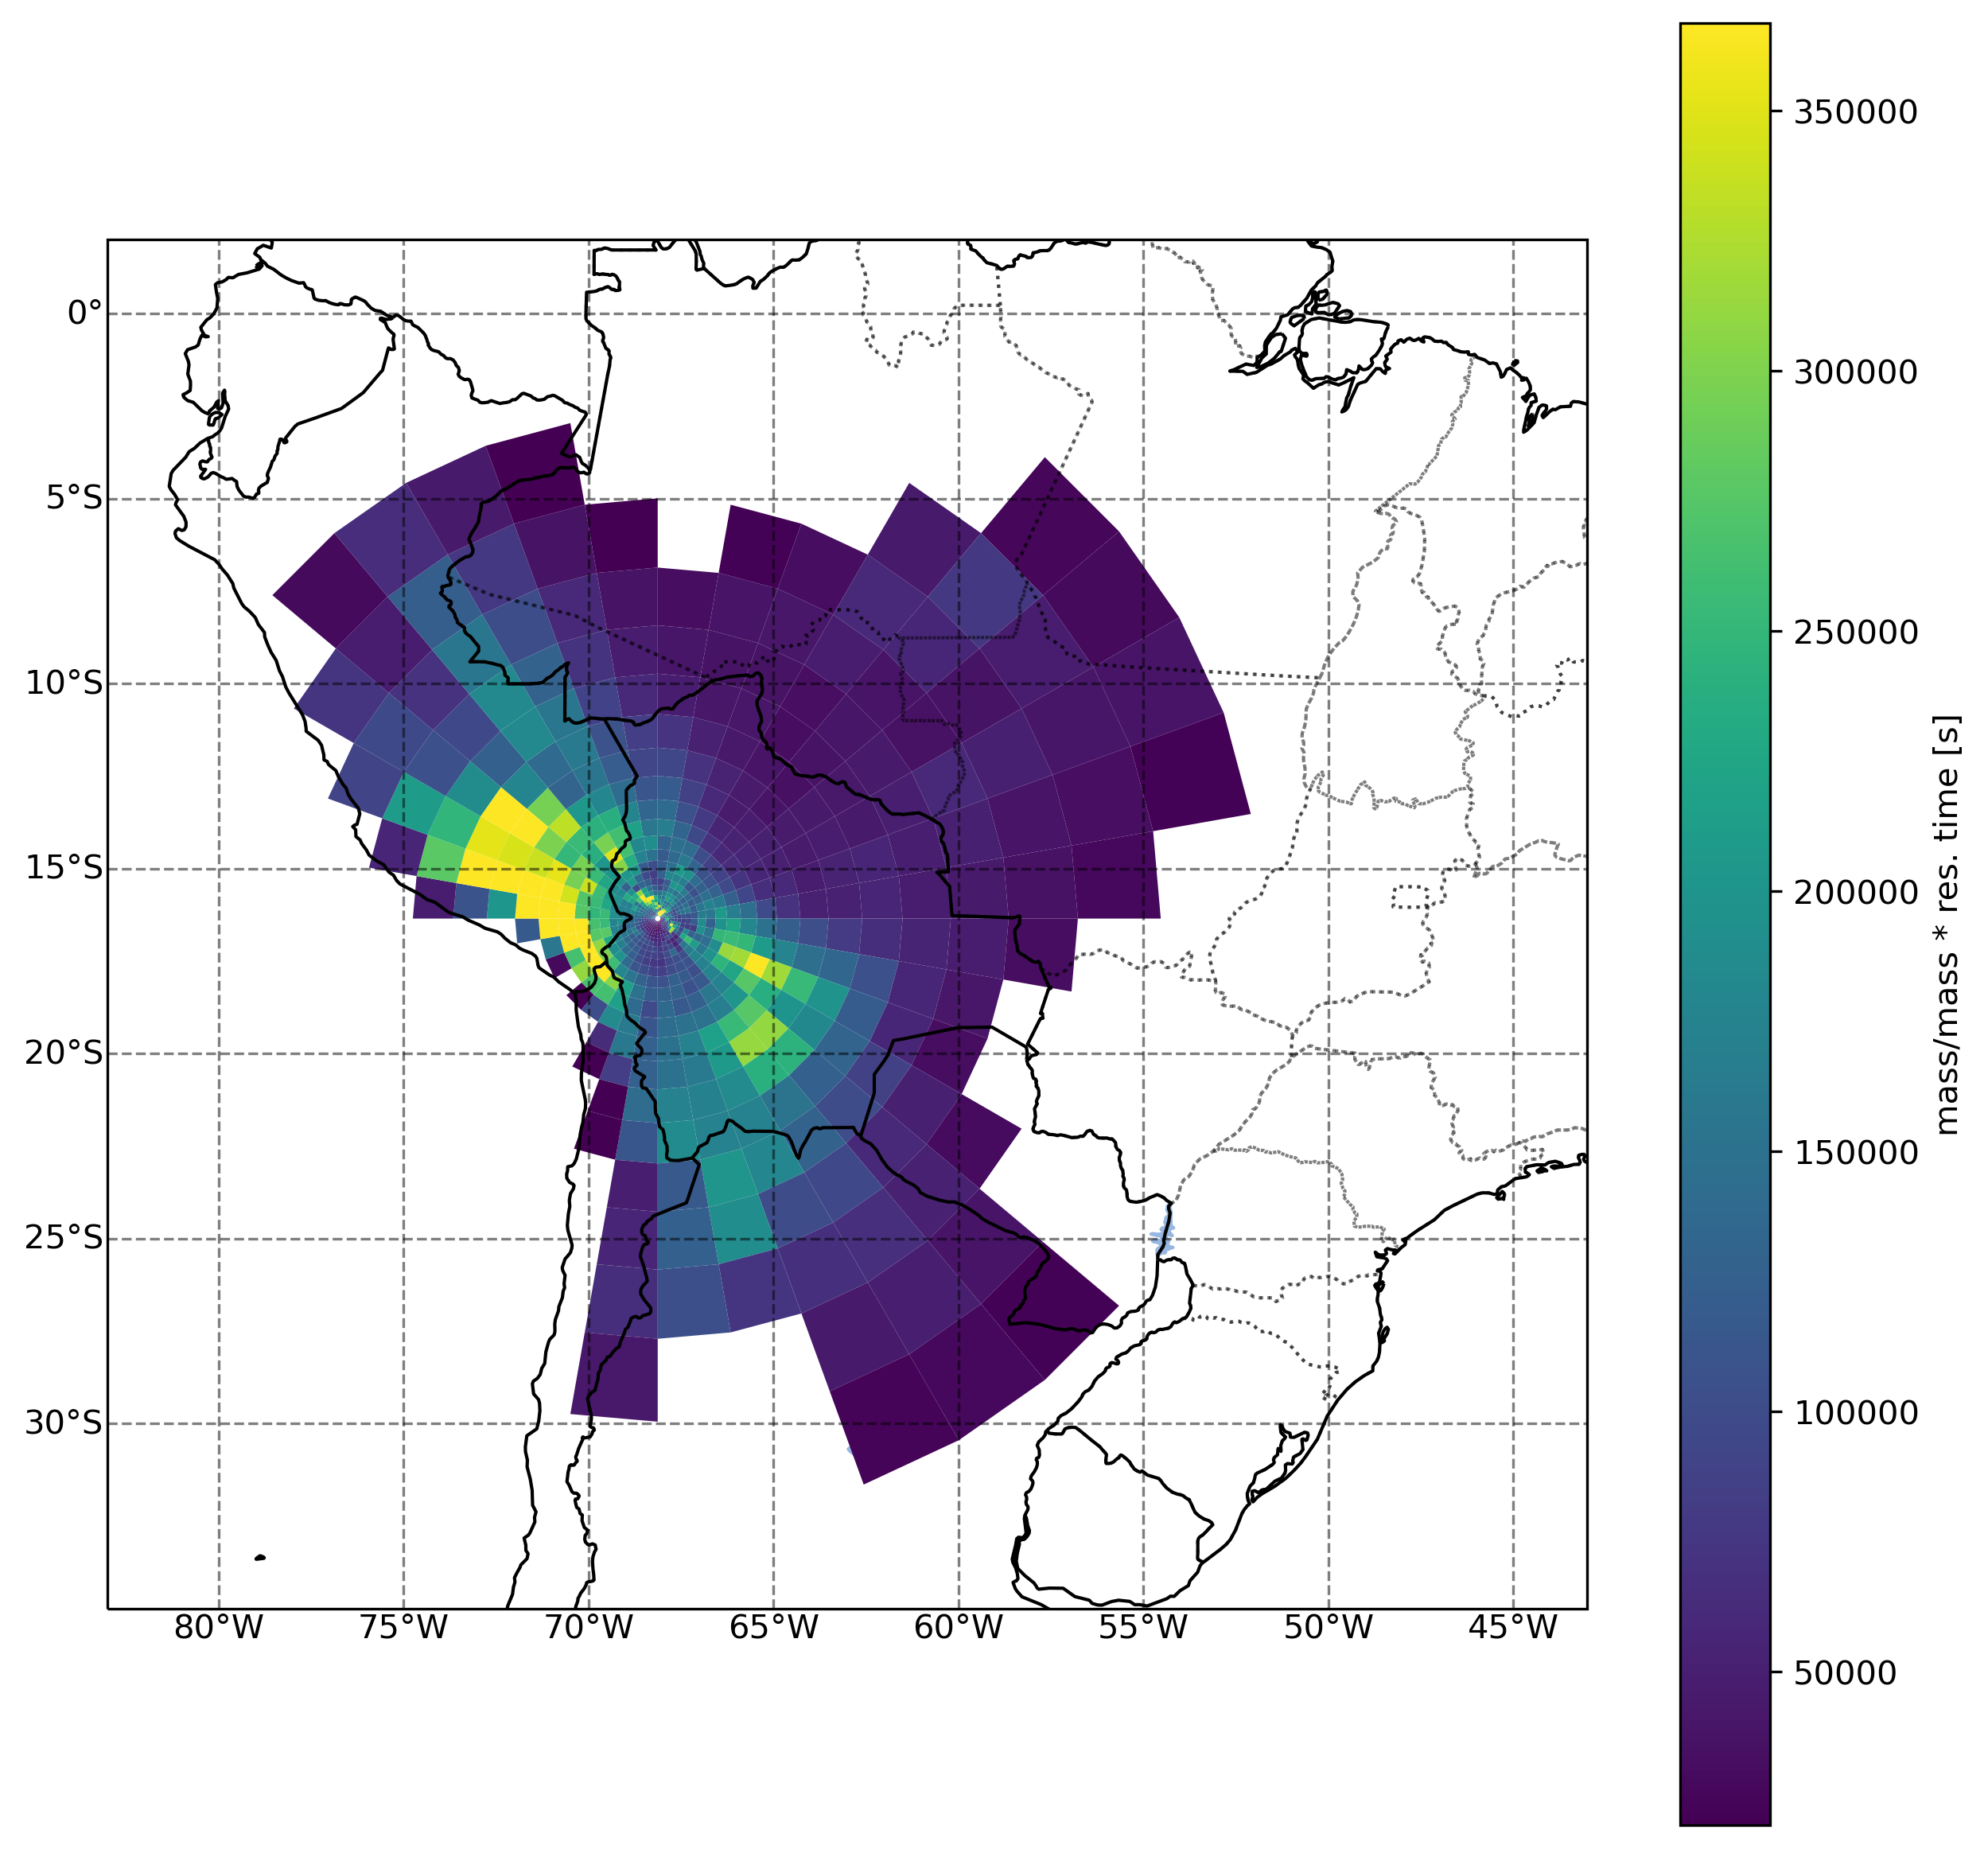

In [29]:

    ax = fa.get_ax_bolivia(fig_args={'figsize':(10,10),'dpi':300},
                           chc_lp_legend=False)
    where = su.where(su[co.CONC] > 2e4)
    fa.logpolar_plot(where, ax=ax, cmap='viridis')
    plt.show()

In [30]:
    sun = ds[{co.ZM:0}]/su
    # sun = ds/ds.sum(co.RL)

In [31]:
    dsun = sun.to_dataframe()[co.CONC]
    dsun = dsun[~dsun.isnull()]

In [32]:
    du = dsun.unstack().T

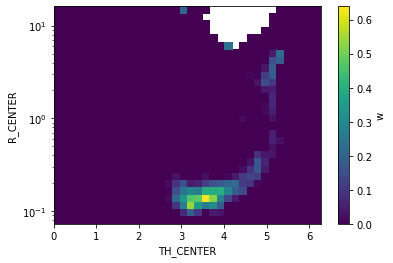

In [33]:
    # bcc['rat'] = (bcc['C4_C5_compounds']/bcc['C9_C13_compounds'])[bcc['C9_C13_compounds']>0]
    # buc = bcc[['RH_station']]['2017-12-06':'2018-05-31'].dropna().copy()
    buc = bcc[['BC']]['2017-12-06':'2018-05-31'].dropna().copy()
    duc = du.loc[buc.index].copy()

    reg = lm.ElasticNet(positive=True,alpha=.17,fit_intercept=False)
    reg.fit(duc,buc)
    we = pd.DataFrame(reg.coef_, index=duc.T.index,columns=['w'])
    we.to_xarray()['w'].plot()
    ax = plt.gca()
    ax.set_yscale('log')
    plt.show()

In [85]:
goo

<xarray.Dataset>
Dimensions:     (R_CENTER: 30, TH_CENTER: 36)
Coordinates:
  * R_CENTER    (R_CENTER) float64 0.08046 0.09633 0.1153 ... 10.38 12.43 14.88
  * TH_CENTER   (TH_CENTER) float64 0.08727 0.2618 0.4363 ... 5.847 6.021 6.196
    NUM         (R_CENTER) int64 73 79 45 68 102 40 ... 117 165 240 342 494 652
    TOPOGRAPHY  (R_CENTER, TH_CENTER) float64 4.666e+03 4.732e+03 ... 109.6
    XLAT        (R_CENTER, TH_CENTER) float64 -16.28 -16.27 ... -1.902 -1.516
    GRIDAREA    (R_CENTER, TH_CENTER) float64 2.566e+06 2.438e+06 ... 8.031e+10
    G_AREA      (R_CENTER, TH_CENTER) float64 0.0002161 0.0002053 ... 6.985 6.5
    XLONG       (R_CENTER, TH_CENTER) float64 -68.12 -68.11 ... -72.0 -69.48
    LAT_00      (R_CENTER, TH_CENTER) float64 -16.28 -16.28 ... -3.571 -2.958
    LON_00      (R_CENTER, TH_CENTER) float64 -68.13 -68.12 ... -72.78 -70.49
    LAT_10      (R_CENTER, TH_CENTER) float64 -16.26 -16.26 ... -1.051 -0.3168
    LON_10      (R_CENTER, TH_CENTER) float64 -68.13 -68.12 ... -73.7 -70.96
    LAT_11      (R_CENTER, TH_CENTER) float64 -16.26 -16.27 ... -0.3168 -0.06941
    LON_11      (R_CENTER, TH_CENTER) float64 -68.12 -68.1 ... -70.96 -68.13
    LAT_01      (R_CENTER, TH_CENTER) float64 -16.28 -16.28 ... -2.958 -2.751
    LON_01      (R_CENTER, TH_CENTER) float64 -68.12 -68.11 ... -70.49 -68.13
    r_length    (R_CENTER) float64 nan nan nan nan nan ... nan nan nan nan nan
    LON         (R_CENTER, TH_CENTER) float64 nan nan nan nan ... nan nan nan
    LAT         (R_CENTER, TH_CENTER) float64 nan nan nan nan ... nan nan nan
Data variables:
    CONC        (R_CENTER, TH_CENTER) float64 2.382e+05 3.869e+05 ... 6.197e+03
    w           (R_CENTER, TH_CENTER) float64 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0

<xarray.Dataset>
Dimensions:     (R_CENTER: 30, TH_CENTER: 36)
Coordinates:
  * R_CENTER    (R_CENTER) float64 0.08046 0.09633 0.1153 ... 10.38 12.43 14.88
  * TH_CENTER   (TH_CENTER) float64 0.08727 0.2618 0.4363 ... 5.847 6.021 6.196
    NUM         (R_CENTER) int64 73 79 45 68 102 40 ... 117 165 240 342 494 652
    TOPOGRAPHY  (R_CENTER, TH_CENTER) float64 4.666e+03 4.732e+03 ... 109.6
    XLAT        (R_CENTER, TH_CENTER) float64 -16.28 -16.27 ... -1.902 -1.516
    GRIDAREA    (R_CENTER, TH_CENTER) float64 2.566e+06 2.438e+06 ... 8.031e+10
    G_AREA      (R_CENTER, TH_CENTER) float64 0.0002161 0.0002053 ... 6.985 6.5
    XLONG       (R_CENTER, TH_CENTER) float64 -68.12 -68.11 ... -72.0 -69.48
    LAT_00      (R_CENTER, TH_CENTER) float64 -16.28 -16.28 ... -3.571 -2.958
    LON_00      (R_CENTER, TH_CENTER) float64 -68.13 -68.12 ... -72.78 -70.49
    LAT_10      (R_CENTER, TH_CENTER) float64 -16.26 -16.26 ... -1.051 -0.3168
    LON_10      (R_CENTER, TH_CENTER) float64 -68.13 -68.12 ... -73.7 -70.96
    LAT_11      (R_CENTER, TH_CENTER) float64 -16.26 -16.27 ... -0.3168 -0.06941
    LON_11      (R_CENTER, TH_CENTER) float64 -68.12 -68.1 ... -70.96 -68.13
    LAT_01      (R_CENTER, TH_CENTER) float64 -16.28 -16.28 ... -2.958 -2.751
    LON_01      (R_CENTER, TH_CENTER) float64 -68.12 -68.11 ... -70.49 -68.13
    r_length    (R_CENTER) float64 nan nan nan nan nan ... nan nan nan nan nan
    LON         (R_CENTER, TH_CENTER) float64 nan nan nan nan ... nan nan nan
    LAT         (R_CENTER, TH_CENTER) float64 nan nan nan nan ... nan nan nan
Data variables:
    CONC        (R_CENTER, TH_CENTER) float64 2.382e+07 3.869e+07 ... 6.197e+05
    w [%]       (R_CENTER, TH_CENTER) float64 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0

/Users/diego/miniconda3/envs/b36/lib/python3.8/site-packages/cartopy/mpl/gridliner.py:307: UserWarning: The .xlabels_top attribute is deprecated. Please use .top_labels to toggle visibility instead.
  warnings.warn('The .xlabels_top attribute is deprecated. Please '
/Users/diego/miniconda3/envs/b36/lib/python3.8/site-packages/cartopy/mpl/gridliner.py:343: UserWarning: The .ylabels_right attribute is deprecated. Please use .right_labels to toggle visibility instead.
  warnings.warn('The .ylabels_right attribute is deprecated. Please '
/Users/diego/miniconda3/envs/b36/lib/python3.8/site-packages/cartopy/mpl/gridliner.py:331: UserWarning: The .ylabels_left attribute is deprecated. Please use .left_labels to toggle visibility instead.
  warnings.warn('The .ylabels_left attribute is deprecated. Please '


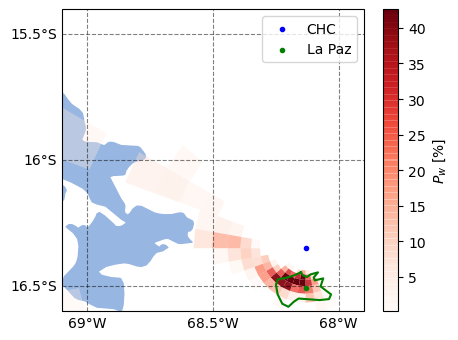

In [97]:
    import cartopy
    dd = .6 
    lo_c = -68.5
    la_c = -16
    lom = lo_c-dd
    loM = lo_c+dd
    lam = la_c-dd
    laM = la_c+dd
    ww='$P_w$ [%]'
    goo = xr.merge([su,we.to_xarray()])*100
    goo = goo.rename({'w':ww})
    ax = fa.get_ax_lapaz(
        fig_args={'figsize':(5,4),'dpi':100},
        chc_lp_legend=True,
        lalo_extent=[lom,loM,lam,laM],
        lola_ticks=[[-69.0,-68.5,-68.0],[-16.5,-16.0,-15.5]],
        y_left_lab=True,
        map_line_alpha=1,
        borders=False,
        plot_cities=False,
        lake_face_color=cartopy.feature.COLORS['water']
    )
    
    fa.logpolar_plot(goo[ww], ax=ax,name=ww)
    ax.plot(co.lola_la_paz_pol[:, 0], co.lola_la_paz_pol[:, 1],c='g')
#     ax.get_legend().remove()

    plt.show()

    ax.figure.savefig('bams_lapaz_bc.pdf')

In [78]:
ax.le

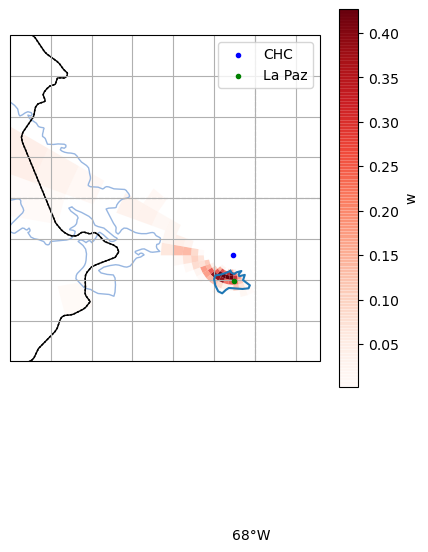

In [49]:
ax.set_extent([-69.5,-67.6,-17,-15])
ax.gridlines()
ax.figure

In [ ]:
    pred = reg.predict(duc)
    buc['pred'] = pred
    buc.corr()

In [ ]:
    s = splot(figsize=(30,5),dpi=300)
    buc = buc.resample('H').mean()
    (buc/buc.sum()).plot(ax=s.ax,linewidth=.5)
    plt.show()

In [ ]:
    sns.distplot(buc['BC'])
    sns.distplot(buc['pred'])
    plt.show()

In [ ]:
    plt.hexbin(x=buc['BC'],y=buc['pred'],extent=[0,500,0,200],gridsize=20)
    plt.show()


if __name__ == '__main__':
    main()